In [1]:
!pip install mlxtend --user
!pip install lightgbm --user
!pip install xgboost --user
!pip install plotly --user

     |████████████████████████████████| 1.4 MB 33.2 MB/s            
     |████████████████████████████████| 9.8 MB 102.2 MB/s            
     |████████████████████████████████| 297 kB 116.5 MB/s            
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 2.0 MB 31.9 MB/s            
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 200.3 MB 33 kB/s               
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 15.3 MB 30.5 MB/s            
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.manifold import MDS
import seaborn as sns         
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
def rmse(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

def mae(y, y_pred):
    return np.mean(np.absolute(np.subtract(y, y_pred)))

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually

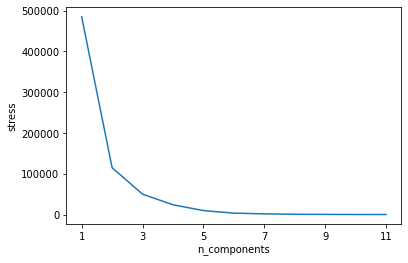

In [40]:
df = pd.read_csv('/mnt/Datasets/merged_df_1_27_23.csv').drop(columns = ['Unnamed: 0'])

df_low_water = df[df['Total_Water_Applied_mm'] == 350].reset_index(drop = True)

####### OUTLIER REMOVAL
df_low_water = df_low_water[(df_low_water['Yield_kg_per_Ha'] > df_low_water['Yield_kg_per_Ha'].quantile(.05)) \
                                                               & (df_low_water['Yield_kg_per_Ha'] < df_low_water['Yield_kg_per_Ha'].quantile(.95))].reset_index(drop = True)
#######

df_low_water_features = df_low_water.drop(columns = ['Yield_kg_per_Ha', 'Field_Name'])

standard_scaler_X = StandardScaler().fit(df_low_water_features)
df_low_water_features = standard_scaler_X.transform(df_low_water_features)

dist_euclid = euclidean_distances(df_low_water_features)

stress = []
max_range = 12

for dim in range(1, max_range):
    mds_low_water = MDS(n_components = dim, dissimilarity = 'precomputed', random_state = 0)
    pts = mds_low_water.fit_transform(dist_euclid)
    stress.append(mds_low_water.stress_)
    
plt.plot(range(1, max_range), stress)
plt.xticks(range(1, max_range, 2))
plt.xlabel('n_components')
plt.ylabel('stress')
plt.show()

In [124]:
df = pd.read_csv('/mnt/Datasets/merged_df_1_27_23.csv').drop(columns = ['Unnamed: 0'])

df_low_water = df[df['Total_Water_Applied_mm'] == 350].reset_index(drop = True)

####### OUTLIER REMOVAL
df_low_water = df_low_water[(df_low_water['Yield_kg_per_Ha'] > df_low_water['Yield_kg_per_Ha'].quantile(.05)) \
                                                               & (df_low_water['Yield_kg_per_Ha'] < df_low_water['Yield_kg_per_Ha'].quantile(.95))].reset_index(drop = True)
#######

df_low_water_features = df_low_water.drop(columns = ['Yield_kg_per_Ha', 'Field_Name'])
dist_euclid = euclidean_distances(df_low_water_features)
mds_low_water = MDS(n_components = 1, dissimilarity = 'precomputed', random_state = 0)
comp_low_water_transform = mds_low_water.fit_transform(dist_euclid)
print(comp_low_water_transform)
print(comp_low_water_transform.shape)

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


[[-7.47743515e+02]
 [ 3.34761098e+03]
 [-1.66138537e+02]
 [ 9.84409792e+01]
 [-9.15920868e+01]
 [-6.16091377e+01]
 [ 1.83998874e+02]
 [-4.40945935e+01]
 [ 1.08430165e+02]
 [-1.82189015e+02]
 [ 3.97644049e+02]
 [ 3.24004287e+02]
 [ 3.59099332e+02]
 [ 3.86031858e+02]
 [ 5.39267377e+02]
 [ 5.66364384e+02]
 [ 4.66538544e+02]
 [ 4.43281013e+02]
 [-4.30333794e+02]
 [-1.11652896e+03]
 [ 2.84702899e+02]
 [ 2.88234270e+02]
 [-1.28603576e+03]
 [ 4.01748058e+02]
 [-2.87244344e+02]
 [-2.82796607e+02]
 [ 4.30727853e+02]
 [ 5.86698522e+02]
 [ 4.65470537e+02]
 [ 4.13193151e+02]
 [-1.02692429e+03]
 [-9.46406343e+02]
 [-1.02796451e+03]
 [-1.04304385e+03]
 [ 9.30157327e+02]
 [ 9.11205348e+02]
 [-1.06550844e+03]
 [-1.03557143e+03]
 [ 2.59386431e+02]
 [-4.94943627e+02]
 [ 2.36325943e+02]
 [ 4.70388034e+02]
 [ 4.16187922e+02]
 [ 3.92195597e+02]
 [-1.56453037e+02]
 [ 2.84084781e+02]
 [ 2.38892913e+02]
 [ 3.31839830e+02]
 [ 2.50313402e+02]
 [ 1.00281606e+03]
 [-3.88845933e+02]
 [-1.02610466e+02]
 [ 4.4525560

In [125]:
df_components_low_water = pd.DataFrame({'comp_1': comp_low_water_transform[:,0]})
print(display(df_components_low_water))

,comp_1
0,-747.743515
1,3347.610976
2,-166.138537
3,98.440979
4,-91.592087
...,...
448,-744.266552
449,-256.932454
450,724.016755
451,-107.052754


None


In [126]:
df_reconstruct_low_water_final = pd.concat([df_low_water[['Field_Name', 'Yield_kg_per_Ha']], df_components_low_water], axis = 1)
print(display(df_reconstruct_low_water_final))

,Field_Name,Yield_kg_per_Ha,comp_1
0,M6I2035,3003.333333,-747.743515
1,M6I2036,2327.722222,3347.610976
2,M6I2037,3051.800000,-166.138537
3,M6I2009,3732.777778,98.440979
4,M6I2010,3919.272727,-91.592087
...,...,...,...
448,M6I21197,2592.048193,-744.266552
449,M6I21199,3725.967742,-256.932454
450,M6I21200,3726.000000,724.016755
451,M6I21201,4002.000000,-107.052754


None


In [127]:
###############
### BUILD 1 ###
###############

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_reconstruct_low_water_final.drop(columns = ['Field_Name']), test_size = 0.2, random_state = 60)

#x values
X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

#y_values
y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

In [128]:
####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'Lightgbm', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
                                bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was e

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75


/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:18:25] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


OLS
MAE on test data: 664.2614257028306


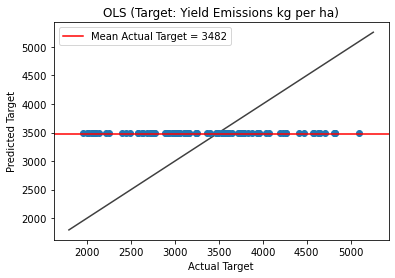

Lasso
MAE on test data: 664.3469636532869


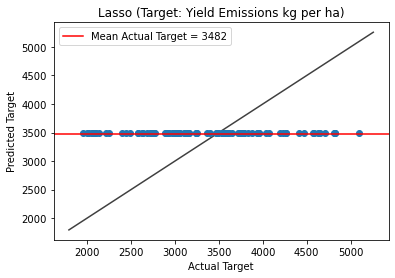

Ridge
MAE on test data: 664.2679780624202


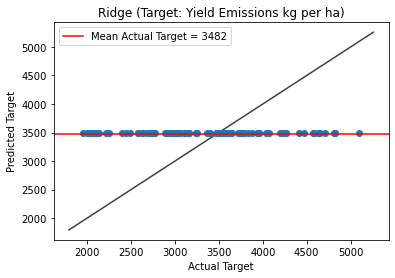

ElasticNet
MAE on test data: 664.3362716946941


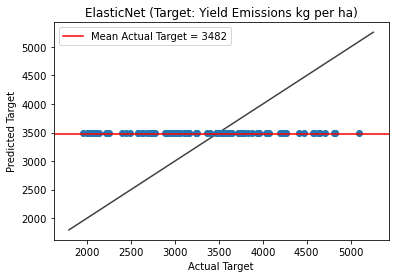

SVR
MAE on test data: 666.5252223280537


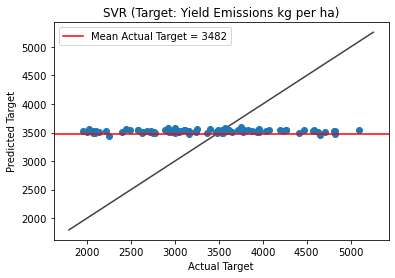

Lightgbm
MAE on test data: 701.2542498713585


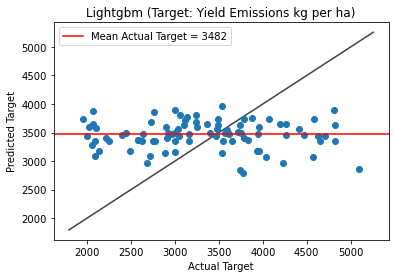

GBR
MAE on test data: 748.9168194169572


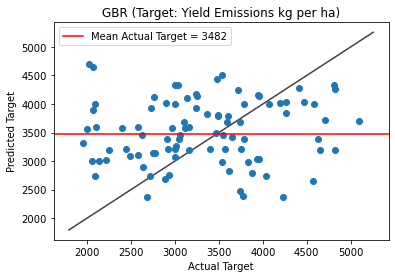

XGBoost
MAE on test data: 753.7689091097728


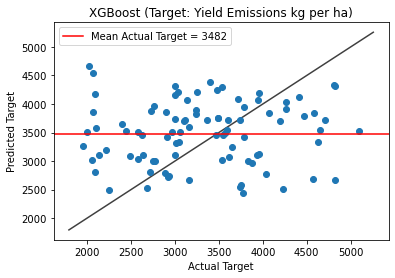

In [129]:
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield Emissions kg per ha)')
    plt.legend()
    plt.show()

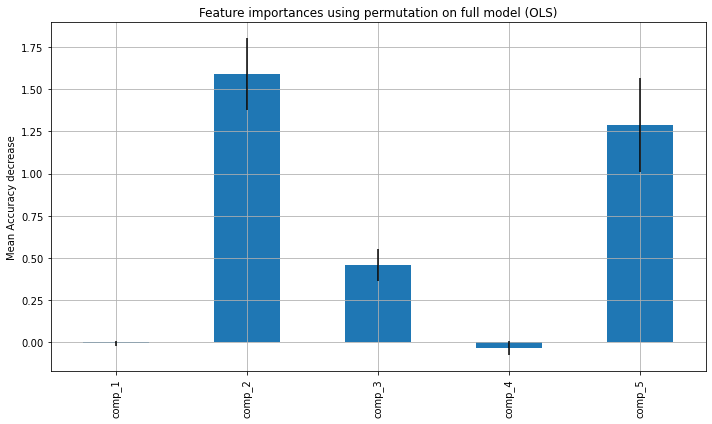

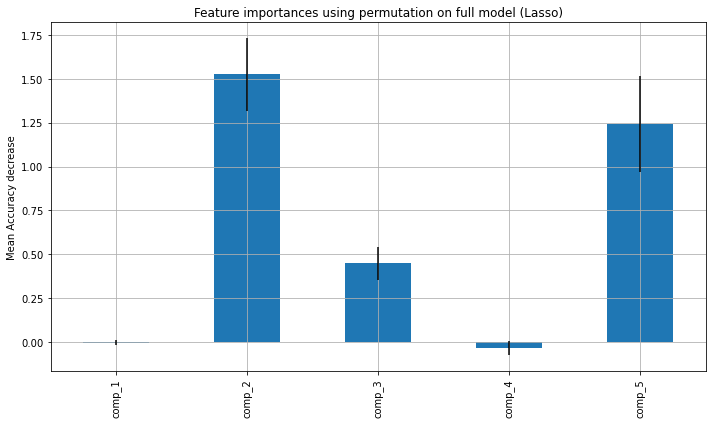

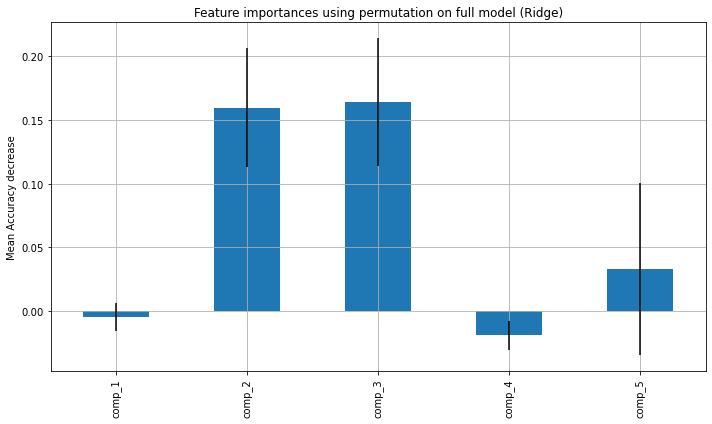

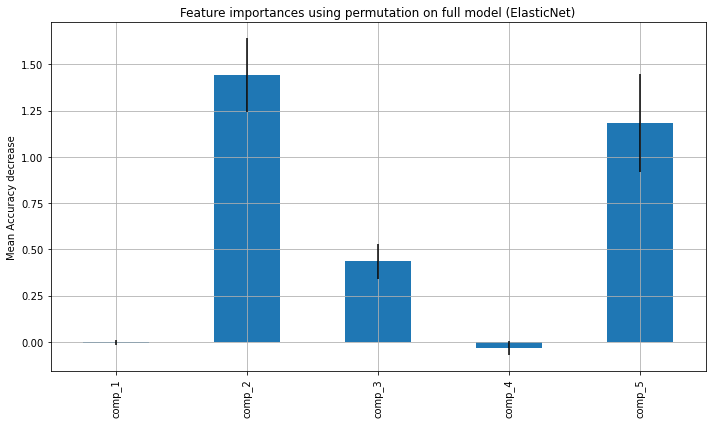

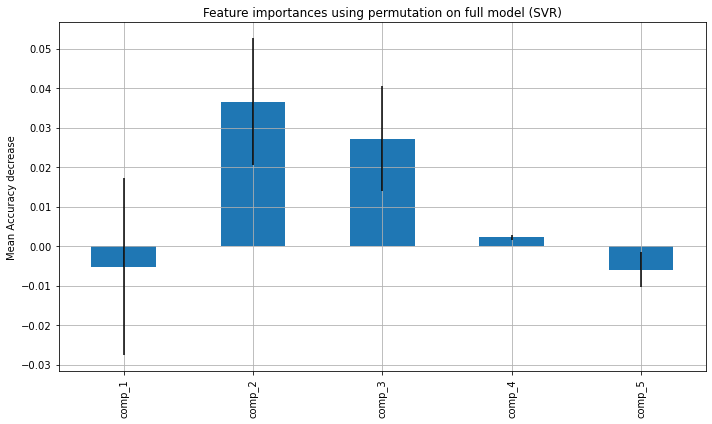

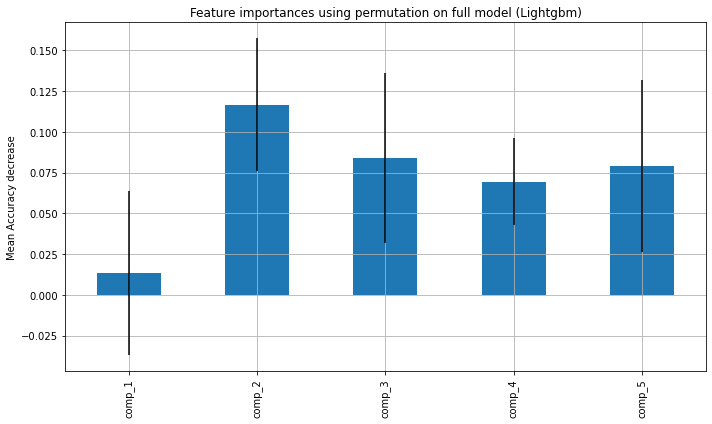

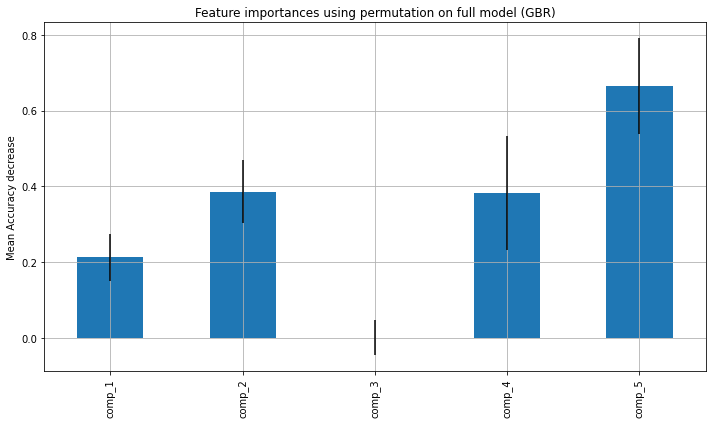

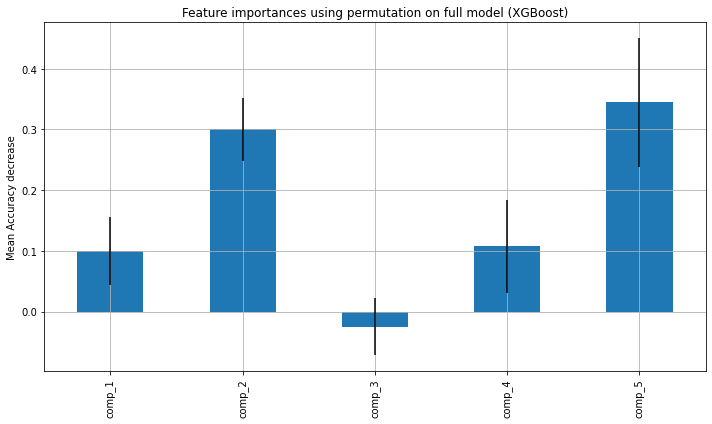

In [19]:
from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually

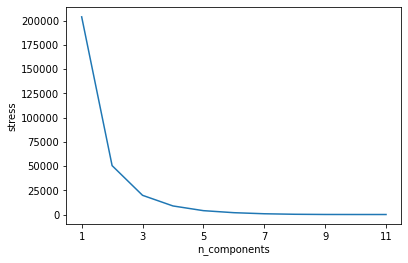

In [132]:
df = pd.read_csv('/mnt/Datasets/merged_df_1_27_23.csv').drop(columns = ['Unnamed: 0'])

df_high_water = df[df['Total_Water_Applied_mm'] == 450].reset_index(drop = True)

####### OUTLIER REMOVAL
df_high_water = df_high_water[(df_high_water['Yield_kg_per_Ha'] > df_high_water['Yield_kg_per_Ha'].quantile(.15)) \
                                                               & (df_high_water['Yield_kg_per_Ha'] < df_high_water['Yield_kg_per_Ha'].quantile(.85))].reset_index(drop = True)
#######

df_high_water_features = df_high_water.drop(columns = ['Yield_kg_per_Ha', 'Field_Name'])

standard_scaler_X = StandardScaler().fit(df_high_water_features)
df_high_water_features = standard_scaler_X.transform(df_high_water_features)

dist_euclid = euclidean_distances(df_high_water_features)

stress = []
max_range = 12

for dim in range(1, max_range):
    mds_high_water = MDS(n_components = dim, dissimilarity = 'precomputed', random_state = 0)
    pts = mds_high_water.fit_transform(dist_euclid)
    stress.append(mds_high_water.stress_)
    
plt.plot(range(1, max_range), stress)
plt.xticks(range(1, max_range, 2))
plt.xlabel('n_components')
plt.ylabel('stress')
plt.show()

In [288]:
df = pd.read_csv('/mnt/Datasets/merged_df_1_27_23.csv').drop(columns = ['Unnamed: 0'])

df_high_water = df[df['Total_Water_Applied_mm'] == 450].reset_index(drop = True)

####### OUTLIER REMOVAL
df_high_water = df_high_water[(df_high_water['Yield_kg_per_Ha'] > df_high_water['Yield_kg_per_Ha'].quantile(.05)) \
                                                               & (df_high_water['Yield_kg_per_Ha'] < df_high_water['Yield_kg_per_Ha'].quantile(.95))].reset_index(drop = True)
#######

df_high_water_features = df_high_water.drop(columns = ['Yield_kg_per_Ha', 'Field_Name'])
dist_euclid = euclidean_distances(df_high_water_features)
mds_high_water = MDS(n_components = 1, dissimilarity = 'precomputed', random_state = 0)
comp_high_water_transform = mds_high_water.fit_transform(dist_euclid)
print(comp_high_water_transform)
print(comp_high_water_transform.shape)

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


[[-6.04963083e+02]
 [-1.40156929e+02]
 [ 4.95474952e+02]
 [ 4.34043098e+02]
 [ 1.05727670e+03]
 [-1.45939446e+03]
 [-1.41164694e+03]
 [-9.67137845e+02]
 [-9.18840489e+02]
 [-3.96984786e+02]
 [-3.04002059e+02]
 [ 9.65684249e+01]
 [ 2.24929181e+02]
 [-4.85299368e+01]
 [ 1.88503500e+02]
 [ 2.82061353e+02]
 [-7.29934252e+02]
 [ 2.15232619e+02]
 [ 5.51661401e+02]
 [-2.08006013e+02]
 [ 2.92327176e+03]
 [-4.46515946e+02]
 [ 4.49745249e+02]
 [ 7.41374114e+02]
 [ 8.85951513e+02]
 [ 5.48415948e+02]
 [ 4.55517126e+02]
 [ 3.22313969e+02]
 [-5.51125333e+02]
 [ 8.78354046e+02]
 [-8.47479723e+02]
 [ 7.68327618e+02]
 [-1.48703224e+03]
 [-1.01643849e+03]
 [-1.76093195e+03]
 [-1.41690099e+03]
 [-1.70973655e+03]
 [-1.30664569e+02]
 [-8.69041979e+02]
 [-1.16935360e+03]
 [-1.58613640e+03]
 [-8.77187928e+02]
 [-9.33466350e+02]
 [ 2.06787339e+02]
 [-1.79037087e+02]
 [-2.05987199e+03]
 [ 2.05983158e+03]
 [ 1.28221448e+03]
 [ 2.09955470e+01]
 [-6.83077340e+02]
 [-1.65126948e+02]
 [-1.27034633e+03]
 [ 2.9073084

In [289]:
df_components_high_water = pd.DataFrame({'comp_1': comp_high_water_transform[:,0]})
print(display(df_components_high_water))

,comp_1
0,-604.963083
1,-140.156929
2,495.474952
3,434.043098
4,1057.276696
...,...
368,75.106195
369,488.268766
370,90.671363
371,-785.746859


None


In [290]:
df_reconstruct_high_water_final = pd.concat([df_high_water[['Field_Name', 'Yield_kg_per_Ha']], df_components_high_water], axis = 1)
print(display(df_reconstruct_high_water_final))

,Field_Name,Yield_kg_per_Ha,comp_1
0,M6V2017,4096.560847,-604.963083
1,M6V2018,3890.719697,-140.156929
2,M6V2039,5349.777778,495.474952
3,M6V2040,5162.888889,434.043098
4,M7V2036,4349.313725,1057.276696
...,...,...,...
368,M6V2195,4014.400000,75.106195
369,M6V2196,4473.600000,488.268766
370,M8V2160,4587.384615,90.671363
371,M8V2163,3372.689076,-785.746859


None


In [291]:
###############
### BUILD 1 ###
###############

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_reconstruct_high_water_final.drop(columns = ['Field_Name']), test_size = 0.2, random_state = 60)

#x values
X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

#y_values
y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

In [292]:
####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'Lightgbm', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
                                bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was e

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75


/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[18:11:42] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


OLS
MAE on test data: 772.7566345991585


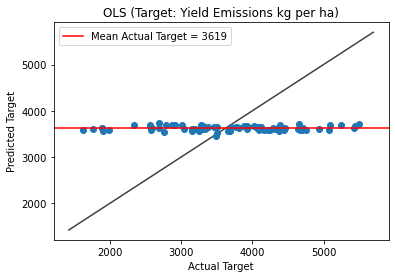

Lasso
MAE on test data: 772.7539088596867


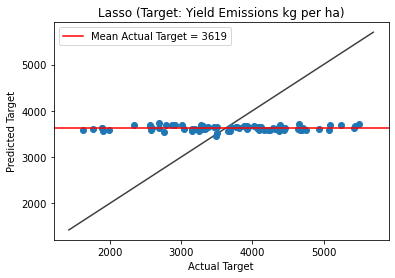

Ridge
MAE on test data: 772.629068626636


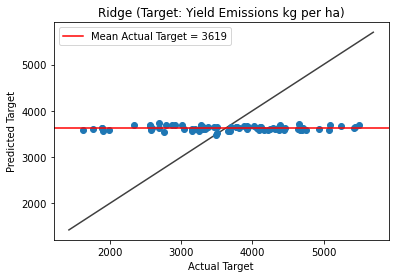

ElasticNet
MAE on test data: 772.7522219018418


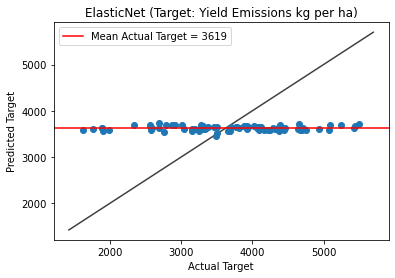

SVR
MAE on test data: 792.2244155410201


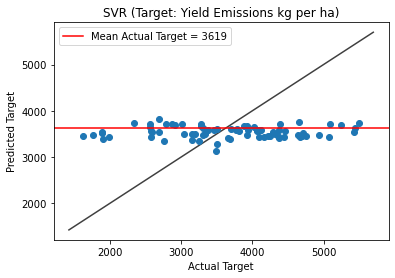

Lightgbm
MAE on test data: 786.853900644108


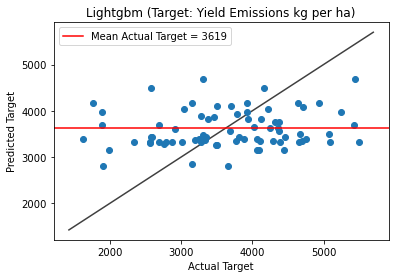

GBR
MAE on test data: 955.603812539228


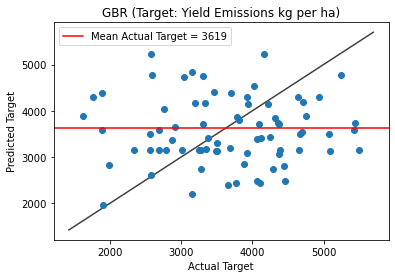

XGBoost
MAE on test data: 1044.829639408368


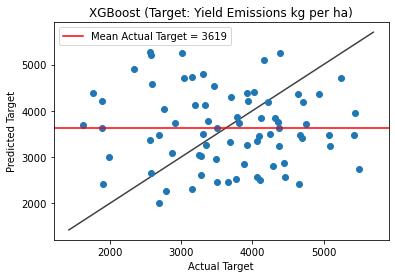

In [293]:
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield Emissions kg per ha)')
    plt.legend()
    plt.show()

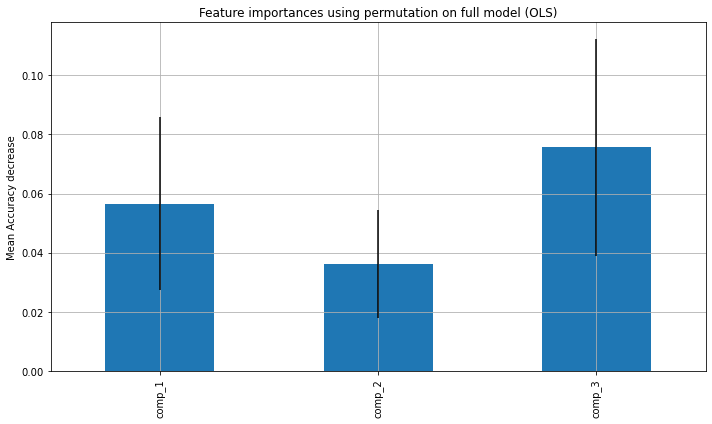

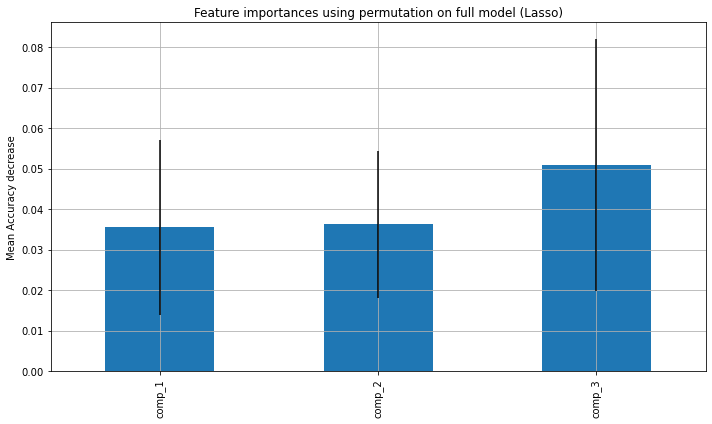

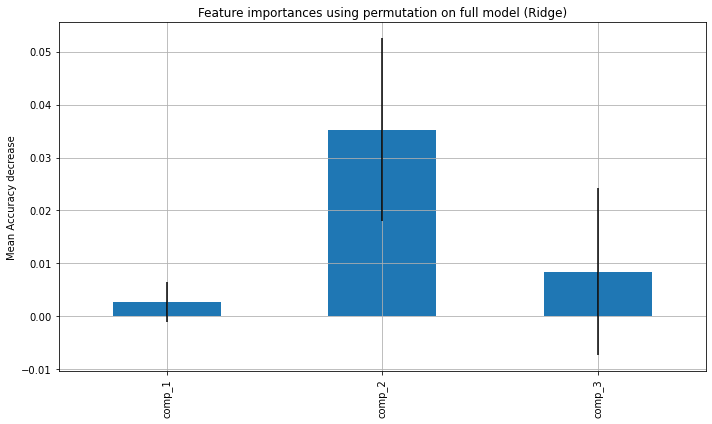

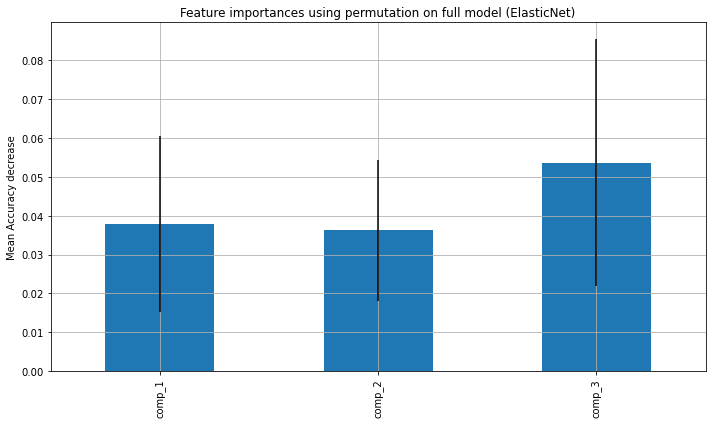

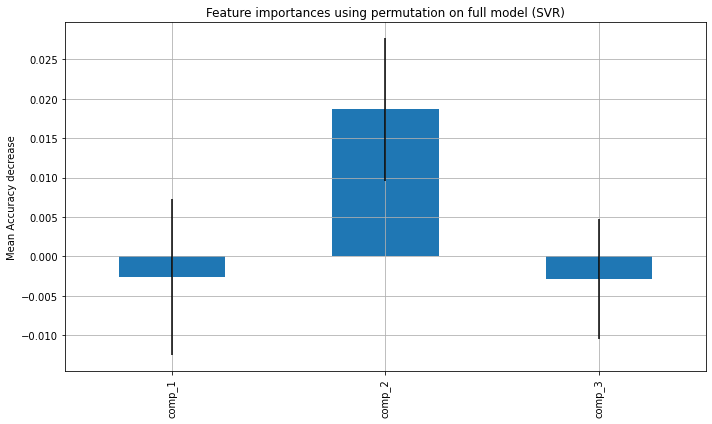

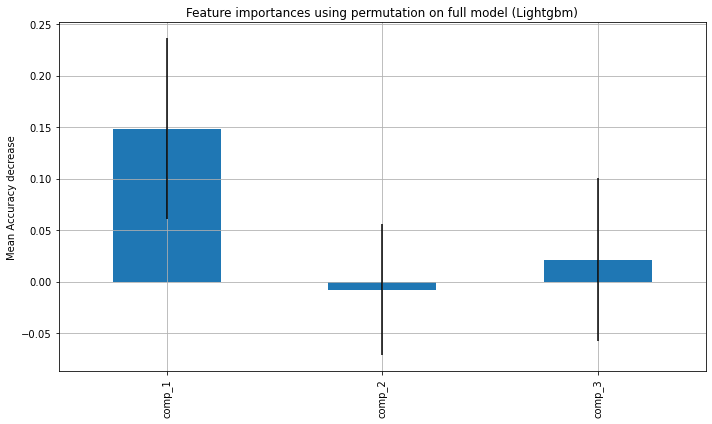

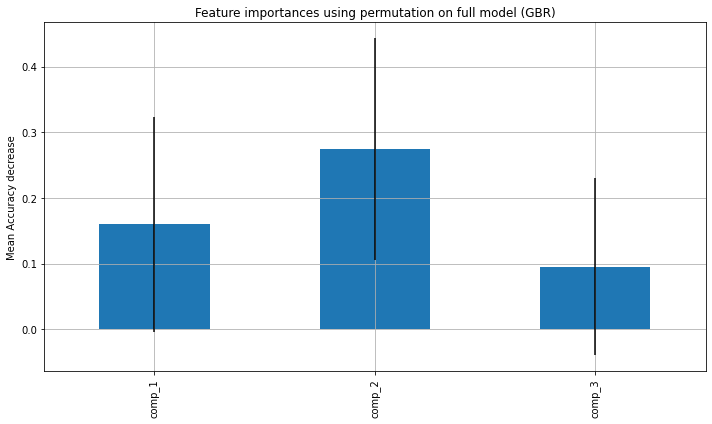

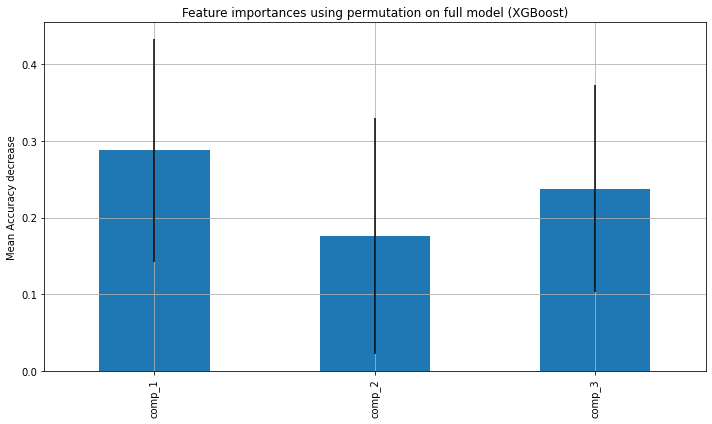

In [172]:
from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually

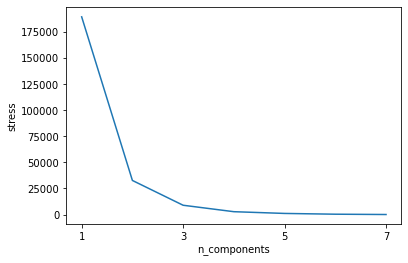

In [88]:
#MDS on composition features

df = pd.read_csv('/mnt/Datasets/merged_df_1_27_23.csv').drop(columns = ['Unnamed: 0'])

df_low_water = df[df['Total_Water_Applied_mm'] == 350].reset_index(drop = True)

####### OUTLIER REMOVAL
df_low_water = df_low_water[(df_low_water['Yield_kg_per_Ha'] > df_low_water['Yield_kg_per_Ha'].quantile(.05)) \
                                                               & (df_low_water['Yield_kg_per_Ha'] < df_low_water['Yield_kg_per_Ha'].quantile(.95))].reset_index(drop = True)
#######

df_low_water = df_low_water.drop(columns = ['Total_Water_Applied_mm'])

df_low_water_comp_features = df_low_water.drop(columns = ['Yield_kg_per_Ha', 'Field_Name', 'CO2_kg_per_Ha', 'Crop_Protection_Application_Doses', 'Soil_Organic_Matter', 'Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(df_low_water_comp_features)
df_low_water_comp_features = standard_scaler_X.transform(df_low_water_comp_features)

dist_euclid = euclidean_distances(df_low_water_comp_features)

stress = []
max_range = 8

for dim in range(1, max_range):
    mds_low_water = MDS(n_components = dim, dissimilarity = 'precomputed', random_state = 0)
    pts = mds_low_water.fit_transform(dist_euclid)
    stress.append(mds_low_water.stress_)
    
plt.plot(range(1, max_range), stress)
plt.xticks(range(1, max_range, 2))
plt.xlabel('n_components')
plt.ylabel('stress')
plt.show()

In [108]:
#MDS on composition features

df = pd.read_csv('/mnt/Datasets/merged_df_1_27_23.csv').drop(columns = ['Unnamed: 0'])

df_low_water = df[df['Total_Water_Applied_mm'] == 350].reset_index(drop = True)

####### OUTLIER REMOVAL
df_low_water = df_low_water[(df_low_water['Yield_kg_per_Ha'] > df_low_water['Yield_kg_per_Ha'].quantile(.05)) \
                                                               & (df_low_water['Yield_kg_per_Ha'] < df_low_water['Yield_kg_per_Ha'].quantile(.95))].reset_index(drop = True)
#######

df_low_water = df_low_water.drop(columns = ['Total_Water_Applied_mm'])

df_low_water_comp_features = df_low_water.drop(columns = ['Yield_kg_per_Ha', 'Field_Name', 'CO2_kg_per_Ha', 'Crop_Protection_Application_Doses', 'Soil_Organic_Matter', 'Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(df_low_water_comp_features)
df_low_water_comp_features = standard_scaler_X.transform(df_low_water_comp_features)

dist_euclid = euclidean_distances(df_low_water_comp_features)

mds_low_water = MDS(n_components = 2, dissimilarity = 'precomputed', random_state = 0)
comp_low_water_transform = mds_low_water.fit_transform(dist_euclid)

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [109]:
df_components_low_water = pd.DataFrame({'comp_1': comp_low_water_transform[:,0], 'comp_2': comp_low_water_transform[:,1]})
print(display(df_components_low_water))

,comp_1,comp_2
0,0.247023,-5.735398
1,2.744745,-3.561353
2,1.669187,-2.042380
3,3.038448,-1.548321
4,2.294274,-2.020294
...,...,...
448,-0.274500,-1.237898
449,-0.274500,-1.237898
450,-0.274501,-1.237898
451,-1.237028,-1.814019


None


In [110]:
df_reconstruct_low_water_final = pd.concat([df_low_water[['Field_Name', 'Yield_kg_per_Ha', 'CO2_kg_per_Ha', 'Crop_Protection_Application_Doses', 'Soil_Organic_Matter']], df_components_low_water], axis = 1)
print(display(df_reconstruct_low_water_final))

,Field_Name,Yield_kg_per_Ha,CO2_kg_per_Ha,Crop_Protection_Application_Doses,Soil_Organic_Matter,comp_1,comp_2
0,M6I2035,3003.333333,-220.35,14.0,2.500000,0.247023,-5.735398
1,M6I2036,2327.722222,3847.21,18.0,2.500000,2.744745,-3.561353
2,M6I2037,3051.800000,415.52,13.0,2.500000,1.669187,-2.042380
3,M6I2009,3732.777778,724.51,9.0,2.500000,3.038448,-1.548321
4,M6I2010,3919.272727,502.10,9.0,2.500000,2.294274,-2.020294
...,...,...,...,...,...,...,...
448,M6I21197,2592.048193,-239.89,15.0,2.597851,-0.274500,-1.237898
449,M6I21199,3725.967742,314.80,17.0,3.120000,-0.274500,-1.237898
450,M6I21200,3726.000000,-312.82,19.0,2.930000,-0.274501,-1.237898
451,M6I21201,4002.000000,485.73,17.0,3.240000,-1.237028,-1.814019


None


In [111]:
###############
### BUILD 1 ###
###############

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_reconstruct_low_water_final.drop(columns = ['Field_Name']), test_size = 0.2, random_state = 60)

#x values
X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

#y_values
y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

In [112]:
####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'Lightgbm', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
                                bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was e

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75


/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[18:17:27] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


OLS
MAE on test data: 680.0419382224813


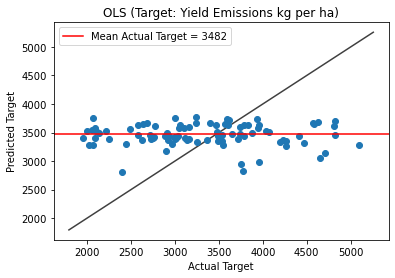

Lasso
MAE on test data: 679.821995494435


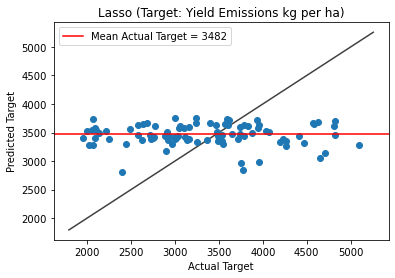

Ridge
MAE on test data: 678.7495873111391


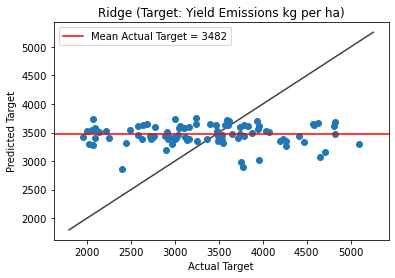

ElasticNet
MAE on test data: 679.8486614142979


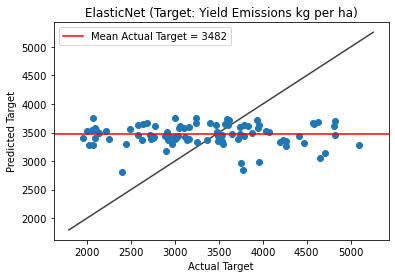

SVR
MAE on test data: 682.5497608734394


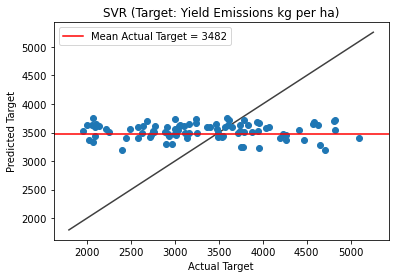

Lightgbm
MAE on test data: 639.9239304392969


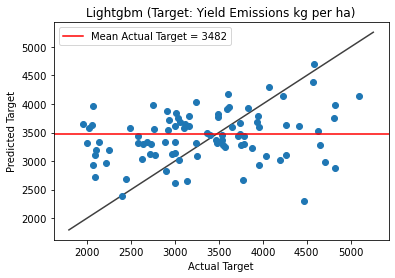

GBR
MAE on test data: 615.160571302945


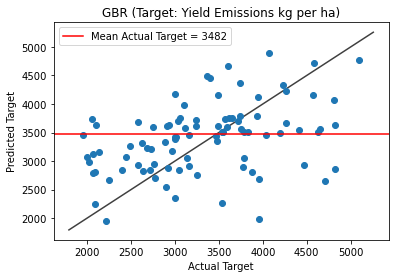

XGBoost
MAE on test data: 617.5286023548746


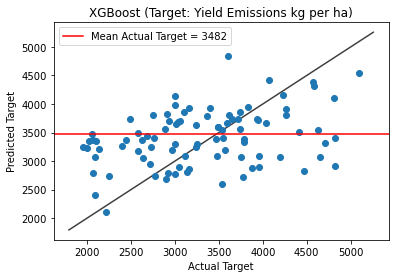

In [113]:
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield Emissions kg per ha)')
    plt.legend()
    plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [114]:
#MDS on composition features

df = pd.read_csv('/mnt/Datasets/merged_df_1_27_23.csv').drop(columns = ['Unnamed: 0'])

df_high_water = df[df['Total_Water_Applied_mm'] == 450].reset_index(drop = True)

####### OUTLIER REMOVAL
df_high_water = df_high_water[(df_high_water['Yield_kg_per_Ha'] > df_high_water['Yield_kg_per_Ha'].quantile(.05)) \
                                                               & (df_high_water['Yield_kg_per_Ha'] < df_high_water['Yield_kg_per_Ha'].quantile(.95))].reset_index(drop = True)
#######

df_high_water = df_high_water.drop(columns = ['Total_Water_Applied_mm'])

df_high_water_comp_features = df_high_water.drop(columns = ['Yield_kg_per_Ha', 'Field_Name', 'CO2_kg_per_Ha', 'Crop_Protection_Application_Doses', 'Soil_Organic_Matter', 'Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(df_high_water_comp_features)
df_high_water_comp_features = standard_scaler_X.transform(df_high_water_comp_features)

dist_euclid = euclidean_distances(df_high_water_comp_features)

stress = []
max_range = 8

for dim in range(1, max_range):
    mds_high_water = MDS(n_components = dim, dissimilarity = 'precomputed', random_state = 0)
    pts = mds_high_water.fit_transform(dist_euclid)
    stress.append(mds_high_water.stress_)
    
plt.plot(range(1, max_range), stress)
plt.xticks(range(1, max_range, 2))
plt.xlabel('n_components')
plt.ylabel('stress')
plt.show()

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


KeyboardInterrupt: 

In [139]:
#MDS on composition features

df = pd.read_csv('/mnt/Datasets/merged_df_1_27_23.csv').drop(columns = ['Unnamed: 0'])

df_high_water = df[df['Total_Water_Applied_mm'] == 450].reset_index(drop = True)

####### OUTLIER REMOVAL
df_high_water = df_high_water[(df_high_water['Yield_kg_per_Ha'] > df_high_water['Yield_kg_per_Ha'].quantile(.05)) \
                                                               & (df_high_water['Yield_kg_per_Ha'] < df_low_water['Yield_kg_per_Ha'].quantile(.95))].reset_index(drop = True)
#######

df_high_water = df_high_water.drop(columns = ['Total_Water_Applied_mm'])

df_high_water_comp_features = df_high_water.drop(columns = ['Yield_kg_per_Ha', 'Field_Name', 'CO2_kg_per_Ha', 'Crop_Protection_Application_Doses', 'Soil_Organic_Matter', 'Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(df_high_water_comp_features)
df_high_water_comp_features = standard_scaler_X.transform(df_high_water_comp_features)

dist_euclid = euclidean_distances(df_high_water_comp_features)

mds_high_water = MDS(n_components = 1, dissimilarity = 'precomputed', random_state = 0)
comp_high_water_transform = mds_high_water.fit_transform(dist_euclid)

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [140]:
df_components_high_water = pd.DataFrame({'comp_1': comp_high_water_transform[:,0]})
print(display(df_components_high_water))

,comp_1
0,0.496290
1,0.086605
2,-1.859633
3,2.145176
4,1.643069
...,...
309,4.751702
310,0.558870
311,-1.321762
312,-1.334789


None


In [141]:
df_reconstruct_high_water_final = pd.concat([df_high_water[['Field_Name', 'Yield_kg_per_Ha', 'CO2_kg_per_Ha', 'Crop_Protection_Application_Doses', 'Soil_Organic_Matter']], df_components_high_water], axis = 1)
print(display(df_reconstruct_high_water_final))

,Field_Name,Yield_kg_per_Ha,CO2_kg_per_Ha,Crop_Protection_Application_Doses,Soil_Organic_Matter,comp_1
0,M6V2017,4096.560847,-246.74,14.0,3.69000,0.496290
1,M6V2018,3890.719697,219.02,20.0,3.38000,0.086605
2,M7V2036,4349.313725,1426.97,25.0,2.31625,-1.859633
3,M6V2075,3283.194444,-1069.08,15.0,3.05000,2.145176
4,M6V2085,3375.357143,-37.64,13.0,2.50000,1.643069
...,...,...,...,...,...,...
309,M6V2195,4014.400000,438.65,15.0,2.10000,4.751702
310,M6V2196,4473.600000,848.98,15.0,2.50000,0.558870
311,M8V2160,4587.384615,449.67,16.0,2.69000,-1.321762
312,M8V2163,3372.689076,-427.99,15.0,3.75000,-1.334789


None


In [142]:
###############
### BUILD 1 ###
###############

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_reconstruct_high_water_final.drop(columns = ['Field_Name']), test_size = 0.2, random_state = 60)

#x values
X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

#y_values
y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

In [143]:
####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'Lightgbm', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
                                bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was e

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75


/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[18:41:08] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


OLS
MAE on test data: 643.3415600635813


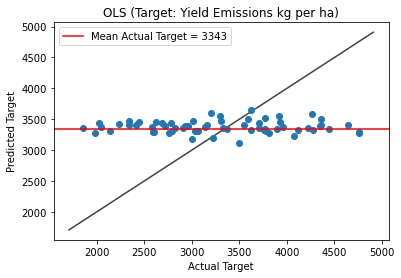

Lasso
MAE on test data: 643.1696632277868


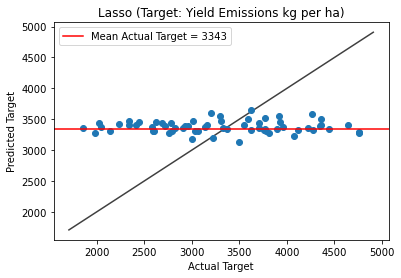

Ridge
MAE on test data: 642.5621542462002


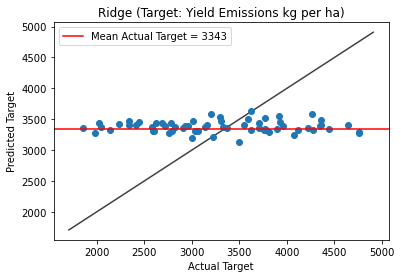

ElasticNet
MAE on test data: 643.1911783608359


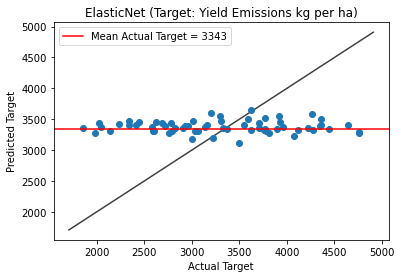

SVR
MAE on test data: 637.1247033608547


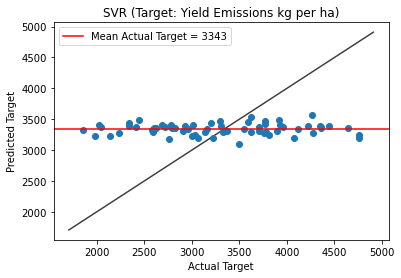

Lightgbm
MAE on test data: 708.2097818437604


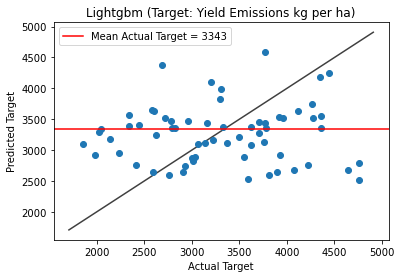

GBR
MAE on test data: 669.6010516563746


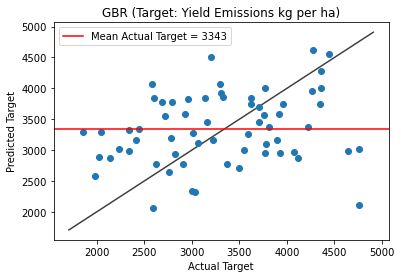

XGBoost
MAE on test data: 683.8786642841796


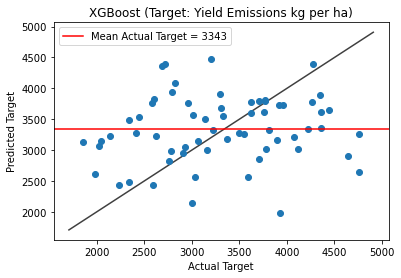

In [144]:
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield Emissions kg per ha)')
    plt.legend()
    plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually

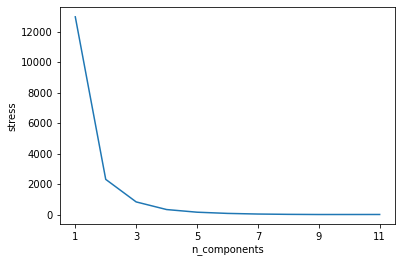

In [308]:
#Min-Max Scaling, no yao johnson, low water

df = pd.read_csv('/mnt/Datasets/merged_df_1_27_23.csv').drop(columns = ['Unnamed: 0'])

df_low_water = df[df['Total_Water_Applied_mm'] == 350].reset_index(drop = True)

df_low_water = df_low_water.drop(columns = ['Total_Water_Applied_mm'])

####### OUTLIER REMOVAL
df_low_water = df_low_water[(df_low_water['Yield_kg_per_Ha'] > df_low_water['Yield_kg_per_Ha'].quantile(.15)) \
                                                               & (df_low_water['Yield_kg_per_Ha'] < df_low_water['Yield_kg_per_Ha'].quantile(.85))].reset_index(drop = True)
#######

df_low_water_features = df_low_water.drop(columns = ['Yield_kg_per_Ha', 'Field_Name'])

min_max_scaler_X = MinMaxScaler().fit(df_low_water_features)
df_low_water_features = min_max_scaler_X.transform(df_low_water_features)

dist_euclid = euclidean_distances(df_low_water_features)

stress = []
max_range = 12

for dim in range(1, max_range):
    mds_low_water = MDS(n_components = dim, dissimilarity = 'precomputed', random_state = 0)
    pts = mds_low_water.fit_transform(dist_euclid)
    stress.append(mds_low_water.stress_)
    
plt.plot(range(1, max_range), stress)
plt.xticks(range(1, max_range, 2))
plt.xlabel('n_components')
plt.ylabel('stress')
plt.show()

In [351]:
df = pd.read_csv('/mnt/Datasets/merged_df_1_27_23.csv').drop(columns = ['Unnamed: 0'])

df_low_water = df[df['Total_Water_Applied_mm'] == 350].reset_index(drop = True)

df_low_water = df_low_water.drop(columns = ['Total_Water_Applied_mm'])

####### OUTLIER REMOVAL
df_low_water = df_low_water[(df_low_water['Yield_kg_per_Ha'] > df_low_water['Yield_kg_per_Ha'].quantile(.15)) \
                                                               & (df_low_water['Yield_kg_per_Ha'] < df_low_water['Yield_kg_per_Ha'].quantile(.85))].reset_index(drop = True)
#######

df_low_water_features = df_low_water.drop(columns = ['Yield_kg_per_Ha', 'Field_Name'])

min_max_scaler_X = MinMaxScaler().fit(df_low_water_features)
df_low_water_features = min_max_scaler_X.transform(df_low_water_features)

dist_euclid = euclidean_distances(df_low_water_features)
mds_low_water = MDS(n_components = 1, dissimilarity = 'precomputed', random_state = 0)
comp_low_water_transform = mds_low_water.fit_transform(dist_euclid)
print(comp_low_water_transform)
print(comp_low_water_transform.shape)

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


[[-1.21009153e+00]
 [-6.41187777e-01]
 [-8.74745454e-01]
 [-8.35448235e-01]
 [-8.76968552e-01]
 [-6.44485463e-01]
 [-3.42724249e-01]
 [ 3.95519046e-01]
 [-7.81235105e-01]
 [ 1.65037616e-01]
 [ 2.42866506e-01]
 [-3.69591628e-01]
 [ 2.42544113e-01]
 [ 1.77045918e-01]
 [ 2.52515104e-01]
 [ 3.41665081e-01]
 [ 3.43566802e-01]
 [ 7.90049677e-01]
 [ 6.12372739e-01]
 [ 5.51702729e-01]
 [-8.56887409e-01]
 [ 2.69354937e-01]
 [ 6.96758251e-02]
 [ 2.93790748e-01]
 [ 2.99963229e-01]
 [ 2.93194415e-01]
 [ 2.97165993e-01]
 [-2.51919931e-02]
 [-1.54308088e-02]
 [-1.00300969e-01]
 [-9.92510186e-02]
 [ 2.41103907e-01]
 [ 1.24618445e-01]
 [ 1.36319053e-01]
 [ 1.29774749e-01]
 [ 4.88250470e-01]
 [ 1.82214436e-01]
 [ 1.42008402e-01]
 [ 1.65781315e-01]
 [ 1.56518852e-01]
 [-7.22386492e-01]
 [-1.28217090e-01]
 [ 7.62636334e-01]
 [ 2.57391159e-01]
 [ 2.68050358e-01]
 [ 2.64888753e-01]
 [ 2.55027965e-01]
 [ 2.68669678e-01]
 [-5.59397108e-02]
 [ 4.78294054e-01]
 [ 7.03246946e-01]
 [-5.75030084e-01]
 [-6.0215810

In [352]:
df_components_low_water = pd.DataFrame({'comp_1': comp_low_water_transform[:,0]})
print(display(df_components_low_water))

,comp_1
0,-1.210092
1,-0.641188
2,-0.874745
3,-0.835448
4,-0.876969
...,...
346,-0.154111
347,0.518991
348,-0.158656
349,-0.214827


None


In [353]:
df_reconstruct_low_water_final = pd.concat([df_low_water[['Field_Name', 'Yield_kg_per_Ha']], df_components_low_water], axis = 1)
print(display(df_reconstruct_low_water_final))

,Field_Name,Yield_kg_per_Ha,comp_1
0,M6I2035,3003.333333,-1.210092
1,M6I2037,3051.800000,-0.641188
2,M6I2009,3732.777778,-0.874745
3,M6I2010,3919.272727,-0.835448
4,M6I2011,4142.400000,-0.876969
...,...,...,...
346,M6I21197,2592.048193,-0.154111
347,M6I21199,3725.967742,0.518991
348,M6I21200,3726.000000,-0.158656
349,M6I21201,4002.000000,-0.214827


None


In [354]:
###############
### BUILD 1 ###
###############

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_reconstruct_low_water_final.drop(columns = ['Field_Name']), test_size = 0.2, random_state = 60)

#x values
X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

#y_values
y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

min_max_scaler_y = MinMaxScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = min_max_scaler_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = min_max_scaler_y.transform(y_test_Yield_kg_per_ha)

In [355]:
####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'Lightgbm', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
                                bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = min_max_scaler_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1)
    inv_transformed_preds = min_max_scaler_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/.local/lib/python3.8/site-packages/lightgbm/basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75


/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[21:32:12] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


OLS
MAE on test data: 484.47226907804395


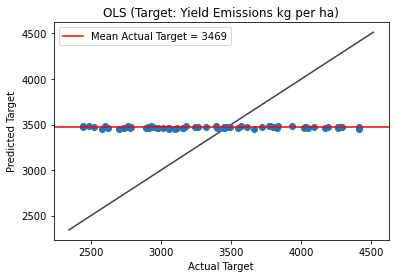

Lasso
MAE on test data: 485.0988394722843


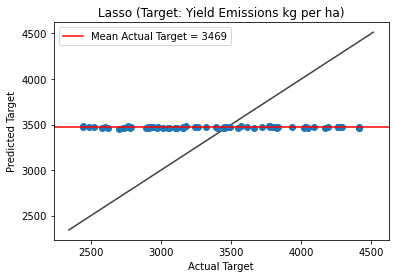

Ridge
MAE on test data: 484.7544529583588


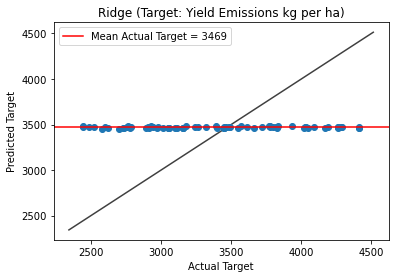

ElasticNet
MAE on test data: 485.02051817300435


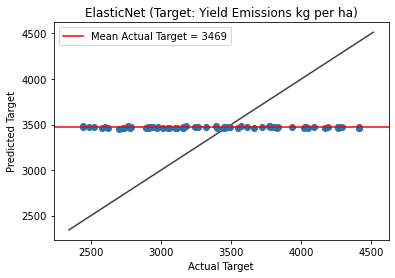

SVR
MAE on test data: 497.3968439112441


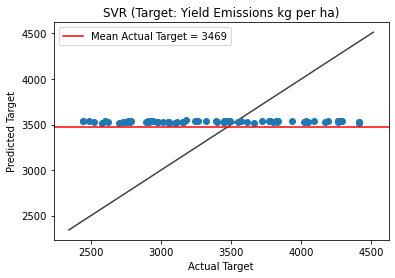

Lightgbm
MAE on test data: 481.6679944466514


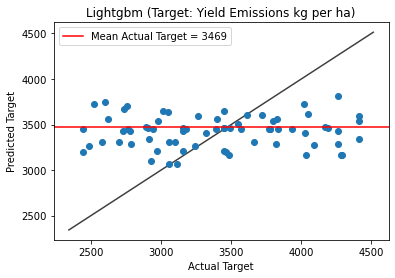

GBR
MAE on test data: 485.78893803029104


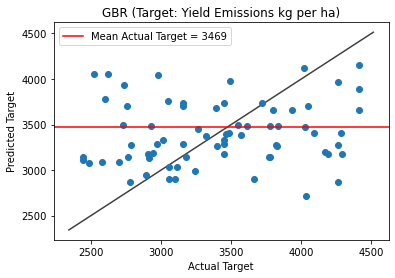

XGBoost
MAE on test data: 468.0889236343054


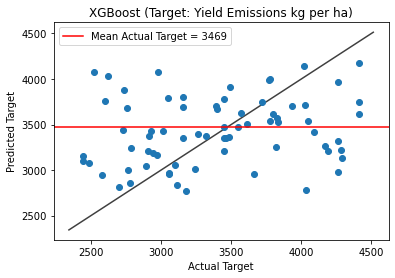

In [356]:
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = min_max_scaler_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1)
    inv_transformed_preds = min_max_scaler_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield Emissions kg per ha)')
    plt.legend()
    plt.show()

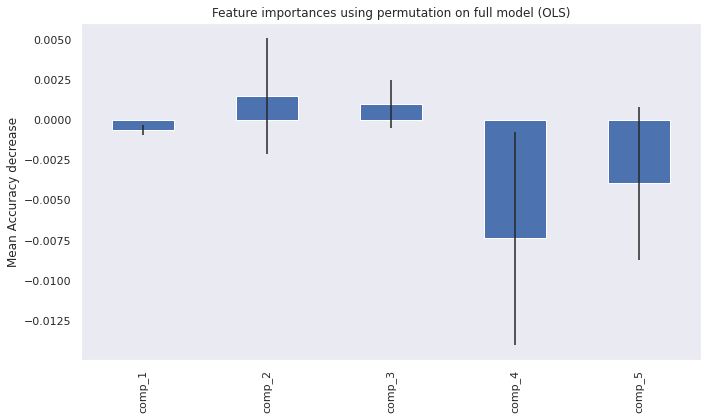

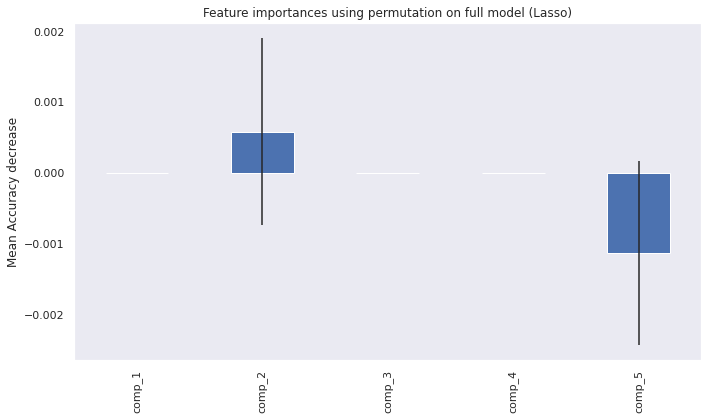

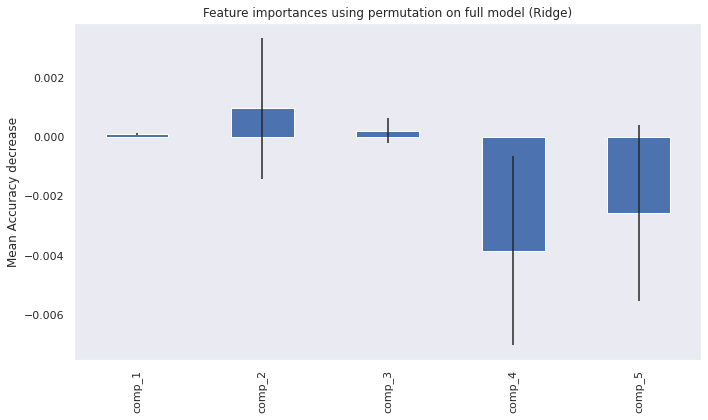

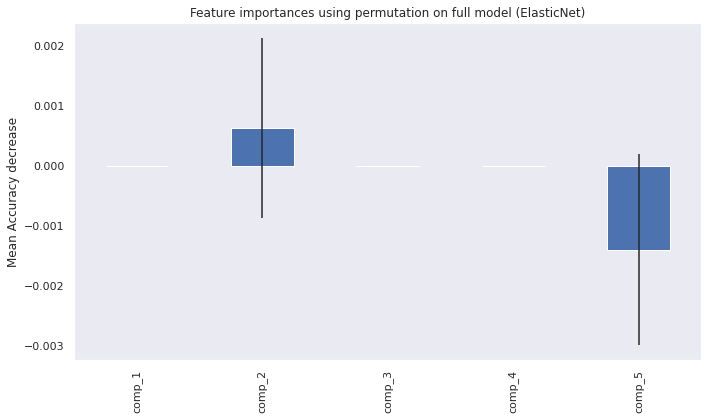

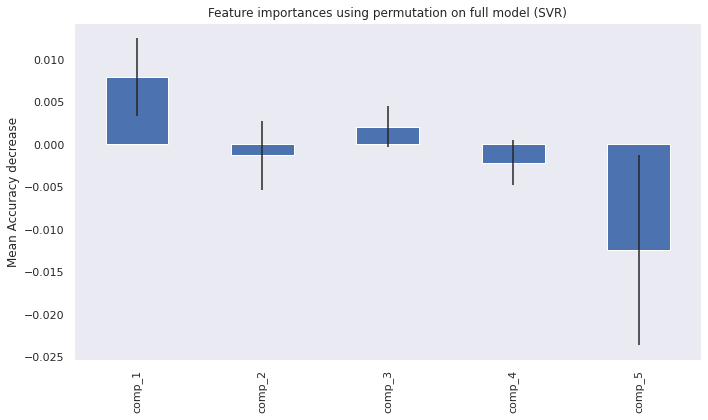

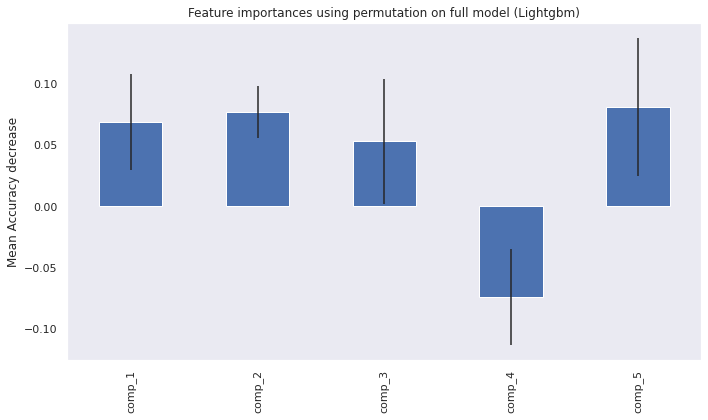

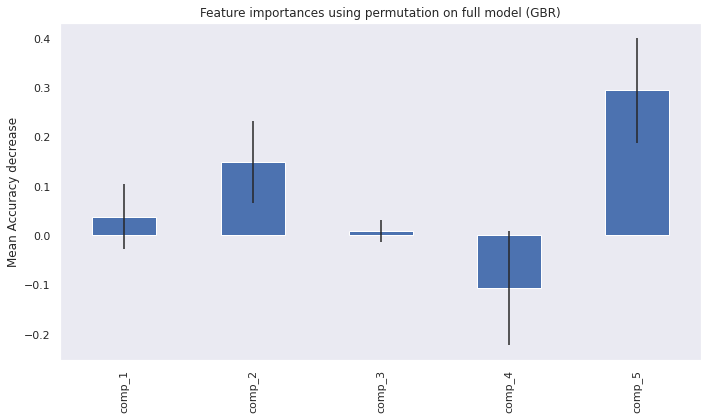

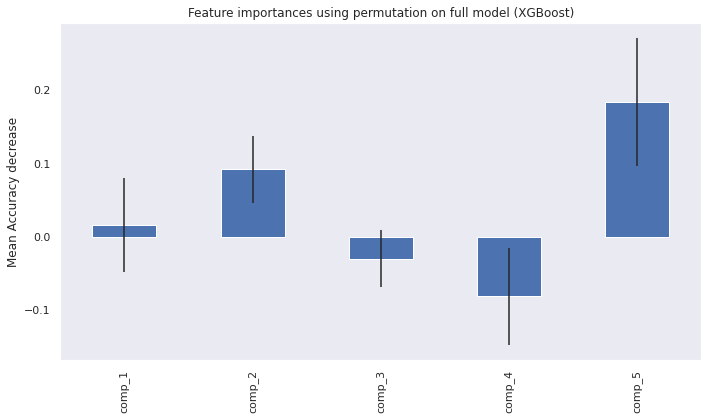

In [261]:
from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually

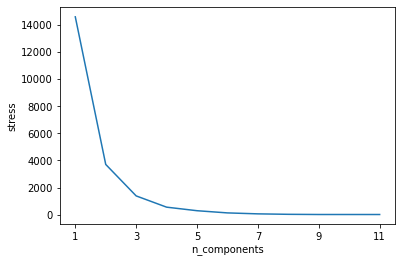

In [358]:
#Min-Max Scaling, no yao johnson, low water

df = pd.read_csv('/mnt/Datasets/merged_df_1_27_23.csv').drop(columns = ['Unnamed: 0'])

df_high_water = df[df['Total_Water_Applied_mm'] == 450].reset_index(drop = True)

df_high_water = df_high_water.drop(columns = ['Total_Water_Applied_mm'])

####### OUTLIER REMOVAL
df_high_water = df_high_water[(df_high_water['Yield_kg_per_Ha'] > df_high_water['Yield_kg_per_Ha'].quantile(.05)) \
                                                               & (df_high_water['Yield_kg_per_Ha'] < df_high_water['Yield_kg_per_Ha'].quantile(.95))].reset_index(drop = True)
#######

df_high_water_features = df_high_water.drop(columns = ['Yield_kg_per_Ha', 'Field_Name'])

min_max_scaler_X = MinMaxScaler().fit(df_high_water_features)
df_high_water_features = min_max_scaler_X.transform(df_high_water_features)

dist_euclid = euclidean_distances(df_high_water_features)

stress = []
max_range = 12

for dim in range(1, max_range):
    mds_high_water = MDS(n_components = dim, dissimilarity = 'precomputed', random_state = 0)
    pts = mds_high_water.fit_transform(dist_euclid)
    stress.append(mds_high_water.stress_)
    
plt.plot(range(1, max_range), stress)
plt.xticks(range(1, max_range, 2))
plt.xlabel('n_components')
plt.ylabel('stress')
plt.show()

In [72]:
df = pd.read_csv('/mnt/Datasets/merged_df_1_27_23.csv').drop(columns = ['Unnamed: 0'])

df_high_water = df[df['Total_Water_Applied_mm'] == 450].reset_index(drop = True)

df_high_water = df_high_water.drop(columns = ['Total_Water_Applied_mm'])

####### OUTLIER REMOVAL
df_high_water = df_high_water[(df_high_water['Yield_kg_per_Ha'] > df_high_water['Yield_kg_per_Ha'].quantile(.15)) \
                                                               & (df_high_water['Yield_kg_per_Ha'] < df_high_water['Yield_kg_per_Ha'].quantile(.85))].reset_index(drop = True)
#######

df_high_water_features = df_high_water.drop(columns = ['Yield_kg_per_Ha', 'Field_Name'])

min_max_scaler_X = MinMaxScaler().fit(df_high_water_features)
df_high_water_features = min_max_scaler_X.transform(df_high_water_features)

dist_euclid = euclidean_distances(df_high_water_features)
mds_high_water = MDS(n_components = 1, dissimilarity = 'precomputed', random_state = 0)
comp_high_water_transform = mds_high_water.fit_transform(dist_euclid)
print(comp_high_water_transform)
print(comp_high_water_transform.shape)

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


[[-2.83796040e-01]
 [ 4.32376492e-04]
 [ 5.93666096e-01]
 [-6.18091563e-01]
 [-5.06882541e-01]
 [-4.96088313e-01]
 [ 1.76641159e-01]
 [ 1.71441100e-01]
 [ 7.22773487e-03]
 [-1.14204792e-01]
 [-1.51887063e-01]
 [ 2.07579186e-01]
 [ 7.97535525e-01]
 [-3.78048765e-01]
 [ 3.54421309e-01]
 [ 4.17865792e-01]
 [-3.76800790e-01]
 [-3.61926696e-01]
 [-3.38848316e-01]
 [-3.41978173e-01]
 [ 4.22543171e-01]
 [ 2.98075879e-01]
 [ 4.84071643e-01]
 [ 2.96751993e-01]
 [ 3.10161624e-01]
 [ 5.81165227e-01]
 [ 5.27726968e-01]
 [ 4.78539541e-01]
 [ 6.19469686e-01]
 [ 4.80123422e-01]
 [ 5.97896758e-01]
 [ 5.25856763e-01]
 [-4.99467147e-03]
 [-1.53582181e+00]
 [-1.14395152e+00]
 [-3.42766037e-01]
 [-5.01266350e-01]
 [-3.48676526e-01]
 [ 8.94827764e-02]
 [ 1.17159253e-01]
 [ 6.25908269e-02]
 [ 1.39638886e-01]
 [-3.23473891e-01]
 [ 2.89208140e-01]
 [ 2.78703890e-01]
 [-3.64629810e-02]
 [-2.75321302e-02]
 [-3.15115641e-02]
 [-4.08511703e-02]
 [-4.03777622e-02]
 [-3.63179558e-02]
 [-1.30070744e-01]
 [-4.1805439

In [73]:
df_components_high_water = pd.DataFrame({'comp_1': comp_high_water_transform[:,0]})
print(display(df_components_high_water))

,comp_1
0,-0.283796
1,0.000432
2,0.593666
3,-0.618092
4,-0.506883
...,...
284,-1.213933
285,-0.142201
286,0.293254
287,0.310835


None


In [74]:
df_reconstruct_high_water_final = pd.concat([df_high_water[['Field_Name', 'Yield_kg_per_Ha']], df_components_high_water], axis = 1)
print(display(df_reconstruct_high_water_final))

,Field_Name,Yield_kg_per_Ha,comp_1
0,M6V2017,4096.560847,-0.283796
1,M6V2018,3890.719697,0.000432
2,M7V2036,4349.313725,0.593666
3,M6V2075,3283.194444,-0.618092
4,M6V2085,3375.357143,-0.506883
...,...,...,...
284,M6V2195,4014.400000,-1.213933
285,M6V2196,4473.600000,-0.142201
286,M8V2160,4587.384615,0.293254
287,M8V2163,3372.689076,0.310835


None


In [75]:
###############
### BUILD 1 ###
###############

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_reconstruct_high_water_final.drop(columns = ['Field_Name']), test_size = 0.2, random_state = 60)

#x values
X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

#y_values
y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

min_max_scaler_y = MinMaxScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = min_max_scaler_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = min_max_scaler_y.transform(y_test_Yield_kg_per_ha)

In [76]:
####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'Lightgbm', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
                                bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = min_max_scaler_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1)
    inv_transformed_preds = min_max_scaler_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/.local/lib/python3.8/site-packages/lightgbm/basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75


/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:26:05] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


OLS
MAE on test data: 639.3097854266189


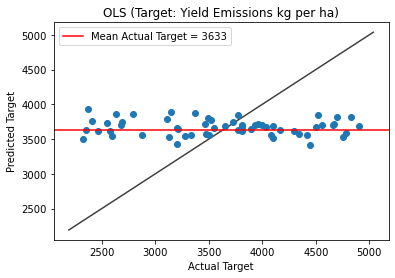

Lasso
MAE on test data: 639.0982874780792


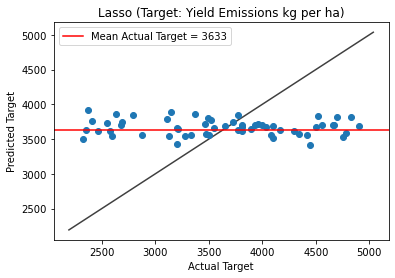

Ridge
MAE on test data: 636.6231000091244


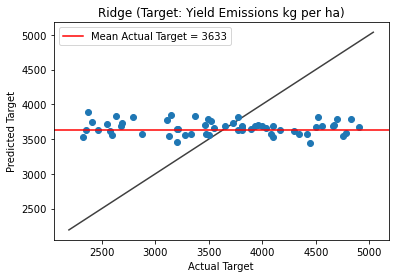

ElasticNet
MAE on test data: 639.0230372870001


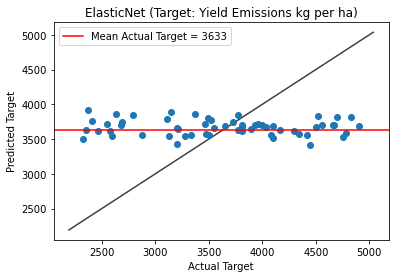

SVR
MAE on test data: 649.4532984269617


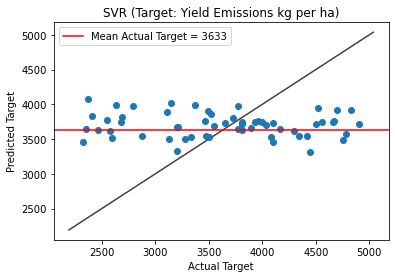

Lightgbm
MAE on test data: 680.3642404720343


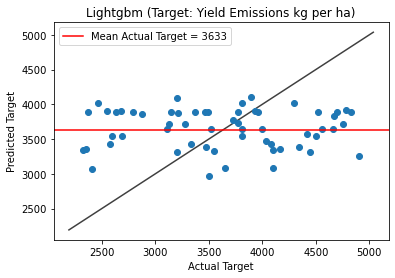

GBR
MAE on test data: 720.4550930267434


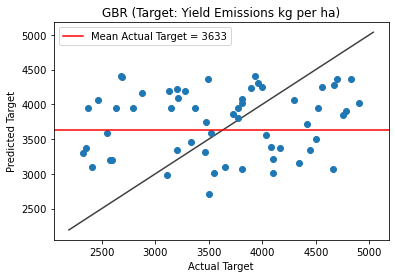

XGBoost
MAE on test data: 769.5566656568492


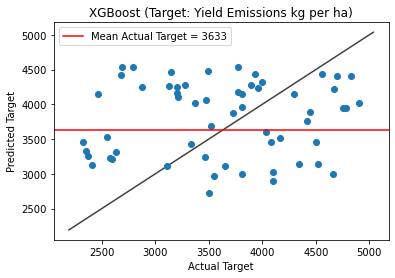

In [77]:
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = min_max_scaler_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1)
    inv_transformed_preds = min_max_scaler_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield Emissions kg per ha)')
    plt.legend()
    plt.show()

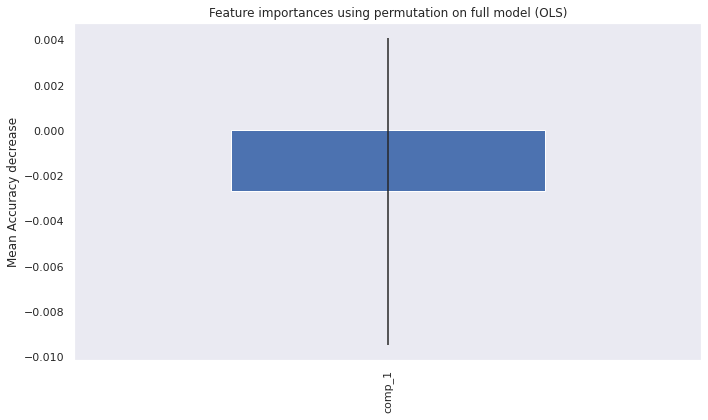

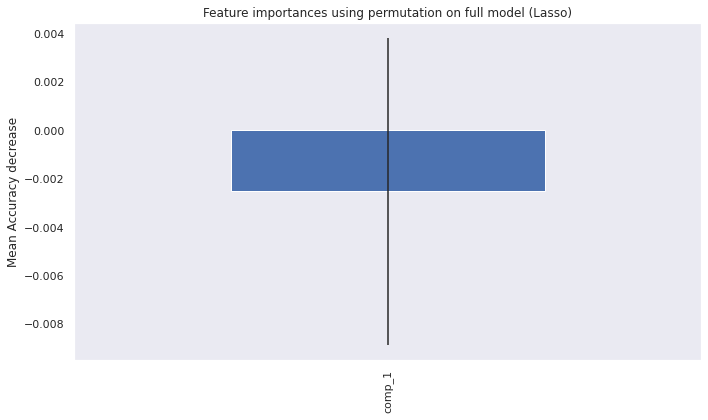

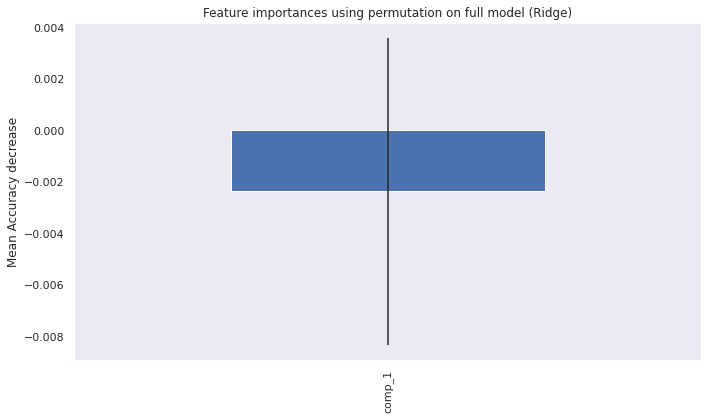

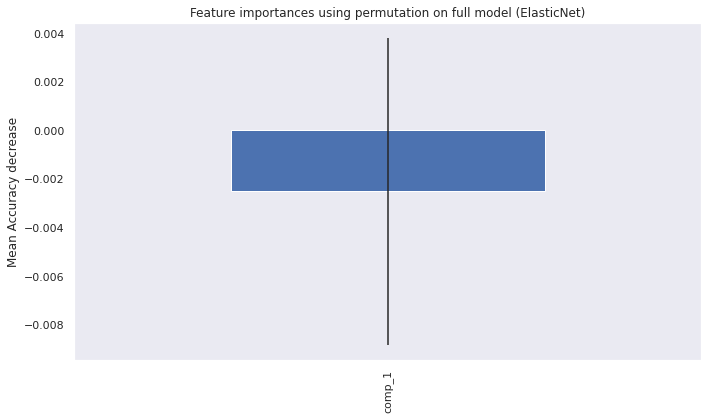

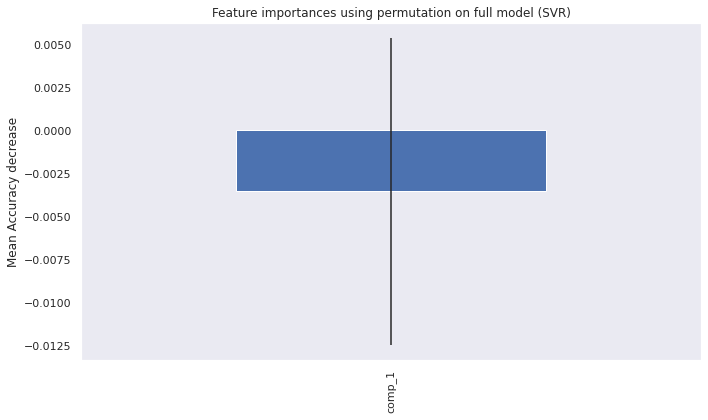

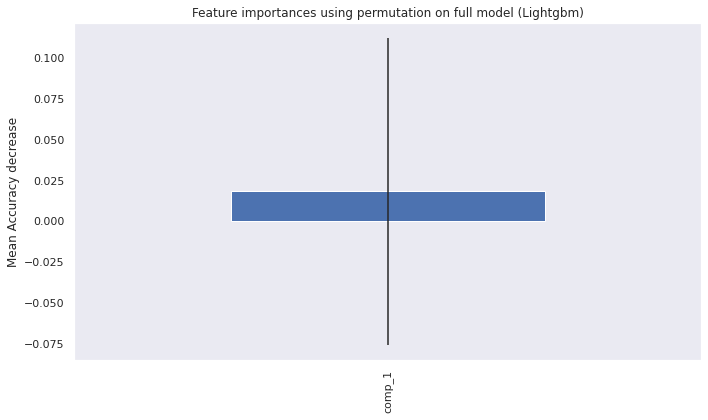

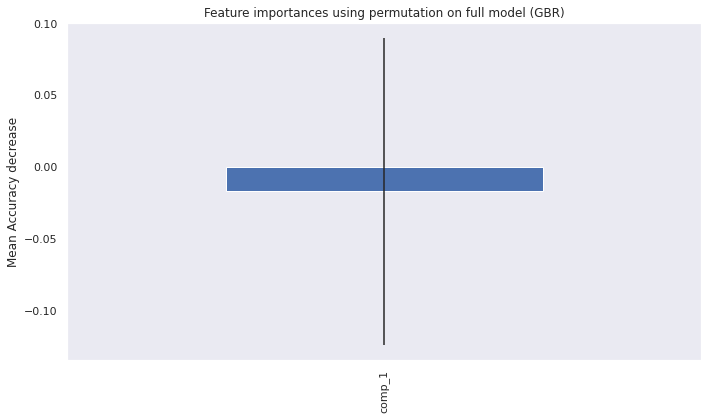

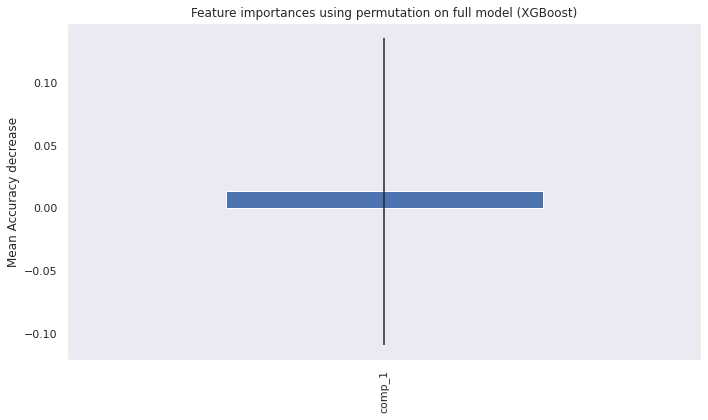

In [298]:
from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [109]:
df = pd.read_csv('/mnt/Datasets/merged_df_1_27_23.csv').drop(columns = ['Unnamed: 0'])

df_low_water = df[df['Total_Water_Applied_mm'] == 350].reset_index(drop = True)

df_low_water_features = df_low_water.drop(columns = ['Yield_kg_per_Ha', 'Field_Name'])

standard_scaler_X = StandardScaler().fit(df_low_water_features)
df_low_water_features = standard_scaler_X.transform(df_low_water_features)

dist_euclid = euclidean_distances(df_low_water_features)
mds_low_water = MDS(n_components = 1, dissimilarity = 'precomputed', random_state = 0)
comp_low_water_transform = mds_low_water.fit_transform(dist_euclid)

df_components_low_water = pd.DataFrame({'comp_1': comp_low_water_transform[:,0]})
df_reconstruct_low_water_final = pd.concat([df_low_water[['Field_Name', 'Yield_kg_per_Ha']], df_components_low_water], axis = 1)
print(display(df_reconstruct_low_water_final))

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


,Field_Name,Yield_kg_per_Ha,comp_1
0,M6I2035,3003.333333,6.384296
1,M6I2036,2327.722222,6.919420
2,M6I2037,3051.800000,2.585012
3,M6I2009,3732.777778,3.976884
4,M6I2010,3919.272727,-3.607558
...,...,...,...
500,M6I21197,2592.048193,-1.107598
501,M6I21199,3725.967742,-1.091491
502,M6I21200,3726.000000,1.831644
503,M6I21201,4002.000000,2.113425


None


In [110]:
import pandas as pd
from sklearn.isotonic import IsotonicRegression
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.isotonic import IsotonicRegression

###############
### BUILD 1 ###
###############

#Yeo-Johnson Scaling
df_reconstruct_low_water_final = df_reconstruct_low_water_final.drop(columns = ['Field_Name'])[['Yield_kg_per_Ha', 'comp_1']]

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_reconstruct_low_water_final, test_size = 0.2, random_state = 60)

#x values
X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

#y_values
y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

In [111]:
# Fit isotonic regression model

data_dict = {'comp_1': X_train_Yield_kg_per_ha[:,0], 'Yield': y_train_Yield_kg_per_ha[:,0]}

temp_df = pd.DataFrame.from_dict(data_dict)

ir = IsotonicRegression() # create an instance of the IsotonicRegression class
  
y_ir = ir.fit_transform(temp_df['comp_1'], temp_df['Yield']) # fit the model and transform the data

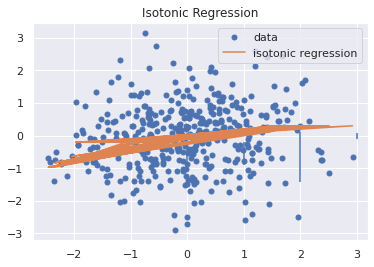

In [112]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
n = 20
lines=[[[i,temp_df['Yield'][i]],[i,y_ir[i]]] for i in range(n)]
  
# Line to measure the difference between actual and target value
lc=LineCollection(lines)
  
plt.plot(temp_df['comp_1'],temp_df['Yield'],'.',markersize=10, label='data')
plt.plot(temp_df['comp_1'],y_ir,'-',markersize=10,label='isotonic regression' )
  
plt.gca().add_collection(lc)
plt.legend() # add a legend
  
plt.title("Isotonic Regression")
plt.show()

In [113]:
temp_df = pd.DataFrame.from_dict(data_dict)

y_ir = ir.fit(temp_df['comp_1'], temp_df['Yield']) # fit the model and transform the data

inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_ir.predict(X_test_Yield_kg_per_ha[:,0]).reshape(-1,1)))                                             
print(mae(inv_transform_y_actuals, inv_transformed_preds))

770.316185756001


In [119]:
df = pd.read_csv('/mnt/Datasets/merged_df_1_27_23.csv').drop(columns = ['Unnamed: 0'])

df_high_water = df[df['Total_Water_Applied_mm'] == 450].reset_index(drop = True)

df_high_water_features = df_high_water.drop(columns = ['Yield_kg_per_Ha', 'Field_Name'])

standard_scaler_X = StandardScaler().fit(df_high_water_features)
df_high_water_features = standard_scaler_X.transform(df_high_water_features)

dist_euclid = euclidean_distances(df_high_water_features)
mds_high_water = MDS(n_components = 1, dissimilarity = 'precomputed', random_state = 0)
comp_high_water_transform = mds_low_water.fit_transform(dist_euclid)

df_components_high_water = pd.DataFrame({'comp_1': comp_high_water_transform[:,0]})
df_reconstruct_high_water_final = pd.concat([df_high_water[['Field_Name', 'Yield_kg_per_Ha']], df_components_high_water], axis = 1)
print(display(df_reconstruct_high_water_final))

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


,Field_Name,Yield_kg_per_Ha,comp_1
0,M6V2017,4096.560847,-1.112214
1,M6V2018,3890.719697,-0.084702
2,M6V2039,5349.777778,-0.239373
3,M6V2040,5162.888889,-0.285745
4,M7V2036,4349.313725,3.074975
...,...,...,...
410,M8V2160,4587.384615,1.356473
411,M8V2161,6741.676647,-3.051212
412,M8V2162,6482.275449,4.118754
413,M8V2163,3372.689076,1.188095


None


In [120]:
import pandas as pd
from sklearn.isotonic import IsotonicRegression
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.isotonic import IsotonicRegression

###############
### BUILD 1 ###
###############

#Yeo-Johnson Scaling
df_reconstruct_high_water_final = df_reconstruct_high_water_final.drop(columns = ['Field_Name'])[['Yield_kg_per_Ha', 'comp_1']]

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_reconstruct_high_water_final, test_size = 0.2, random_state = 60)

#x values
X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

#y_values
y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

In [121]:
# Fit isotonic regression model

data_dict = {'comp_1': X_train_Yield_kg_per_ha[:,0], 'Yield': y_train_Yield_kg_per_ha[:,0]}

temp_df = pd.DataFrame.from_dict(data_dict)

ir = IsotonicRegression(out_of_bounds = 'clip') # create an instance of the IsotonicRegression class
  
y_ir = ir.fit_transform(temp_df['comp_1'], temp_df['Yield']) # fit the model and transform the data

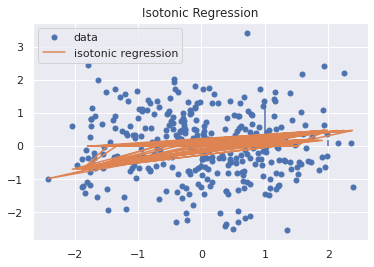

In [122]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
n = 20
lines=[[[i,temp_df['Yield'][i]],[i,y_ir[i]]] for i in range(n)]
  
# Line to measure the difference between actual and target value
lc=LineCollection(lines)
  
plt.plot(temp_df['comp_1'],temp_df['Yield'],'.',markersize=10, label='data')
plt.plot(temp_df['comp_1'],y_ir,'-',markersize=10,label='isotonic regression' )
  
plt.gca().add_collection(lc)
plt.legend() # add a legend
  
plt.title("Isotonic Regression")
plt.show()

In [123]:
temp_df = pd.DataFrame.from_dict(data_dict)

y_ir = ir.fit(temp_df['comp_1'], temp_df['Yield']) # fit the model and transform the data

inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_ir.predict(X_test_Yield_kg_per_ha[:,0]).reshape(-1,1)))                                             
print(mae(inv_transform_y_actuals, inv_transformed_preds))

1076.4849285552991
